<h3>Basic Process Overview</h3>

<p>
This project aims to build a predictive model for diagnosing diabetes using a supervised learning approach. Specifically, it uses the <strong>K-Nearest Neighbors (KNN)</strong> algorithm, which is a distance-based classification method.
</p>

<p>
The target variable in the dataset is <code>Outcome</code>, where:
<ul>
  <li><code>1</code> indicates the person is diabetic</li>
  <li><code>0</code> indicates the person is non-diabetic</li>
</ul>
The model learns from labeled data to classify new patient records based on their medical attributes.
</p>

<h4>Workflow Steps</h4>

<ol>
  <li><strong>Importing Libraries:</strong> Essential Python libraries such as <code>pandas</code>, <code>numpy</code>, <code>matplotlib</code>, <code>seaborn</code>, and <code>sklearn</code> are imported.</li>

  <li><strong>Data Loading:</strong> The diabetes dataset is loaded using <code>pandas.read_csv()</code>, and initial exploration is performed to understand its structure.</li>

  <li><strong>Exploratory Data Analysis:</strong> Summary statistics and visualizations help identify data distribution, correlations, and potential outliers.</li>

  <li><strong>Data Cleaning & Preprocessing:</strong>
    <ul>
      <li>Missing or zero-like values in key columns are handled.</li>
      <li>Feature scaling is applied using <code>StandardScaler</code> to ensure distance-based methods like KNN work effectively.</li>
    </ul>
  </li>

  <li><strong>Model Building:</strong> The data is split into training and testing sets. The KNN classifier is trained on the training set using selected features.</li>

  <li><strong>Prediction & Evaluation:</strong> The trained model is used to predict diabetes on unseen data. Metrics such as <strong>accuracy</strong>, <strong>confusion matrix</strong>, <strong>precision</strong>, <strong>recall</strong>, and <strong>F1-score</strong> are used to assess performance.</li>

  <li><strong>Conclusion:</strong> The notebook summarizes the model's effectiveness and suggests possible improvements like hyperparameter tuning or testing other algorithms.</li>
</ol>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/diabetes-data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h3>Dataset Overview</h3>

<p>
The dataset contains <strong>768 records</strong> with <strong>9 columns</strong> and no missing values. It includes medical features to help predict diabetes. The target column is <code>Outcome</code>, where:
<ul>
  <li><code>1</code> = Diabetic</li>
  <li><code>0</code> = Non-Diabetic</li>
</ul>
</p>

<table border="1" cellspacing="0" cellpadding="4">
  <tr>
    <th>Feature</th>
    <th>Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Pregnancies</td>
    <td>int</td>
    <td>Number of pregnancies</td>
  </tr>
  <tr>
    <td>Glucose</td>
    <td>int</td>
    <td>Plasma glucose level</td>
  </tr>
  <tr>
    <td>BloodPressure</td>
    <td>int</td>
    <td>Diastolic BP (mm Hg)</td>
  </tr>
  <tr>
    <td>SkinThickness</td>
    <td>int</td>
    <td>Skin fold thickness (mm)</td>
  </tr>
  <tr>
    <td>Insulin</td>
    <td>int</td>
    <td>2-Hour serum insulin</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>float</td>
    <td>Body Mass Index</td>
  </tr>
  <tr>
    <td>DiabetesPedigreeFunction</td>
    <td>float</td>
    <td>Family history score</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>int</td>
    <td>Age (years)</td>
  </tr>
  <tr>
    <td><strong>Outcome</strong></td>
    <td>int</td>
    <td><strong>Target: 1 = Diabetic, 0 = Not</strong></td>
  </tr>
</table>

<p style="margin-top: 10px;">
Data types: 7 integer columns, 2 float columns. All values are non-null and ready for analysis.
</p>


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3>Statistical Summary</h3>

<p>
The following table shows the descriptive statistics for each feature in the dataset. It includes measures like <strong>mean</strong>, <strong>standard deviation</strong>, <strong>minimum</strong>, <strong>maximum</strong>, and quartile values.
</p>

<ul>
  <li><strong>Mean & Std:</strong> Indicates the average and spread of each feature.</li>
  <li><strong>Min & Max:</strong> Helps identify the range of values and potential outliers.</li>
  <li><strong>25%, 50%, 75%:</strong> Represent the lower quartile, median, and upper quartile respectively.</li>
</ul>

<p>
Key observations:
</p>

<ul>
  <li>Some features like <code>Glucose</code>, <code>BloodPressure</code>, <code>SkinThickness</code>, <code>Insulin</code>, and <code>BMI</code> have a minimum value of <code>0</code>, which is medically unrealistic and likely indicates missing or unrecorded data.</li>
  <li><code>Age</code> ranges from 21 to 81 years, with a median of 29.</li>
  <li><code>Outcome</code> has a mean of approximately 0.35, suggesting that around 35% of the patients in the dataset are diabetic.</li>
</ul>


In [1]:
# df.duplicated().sum()

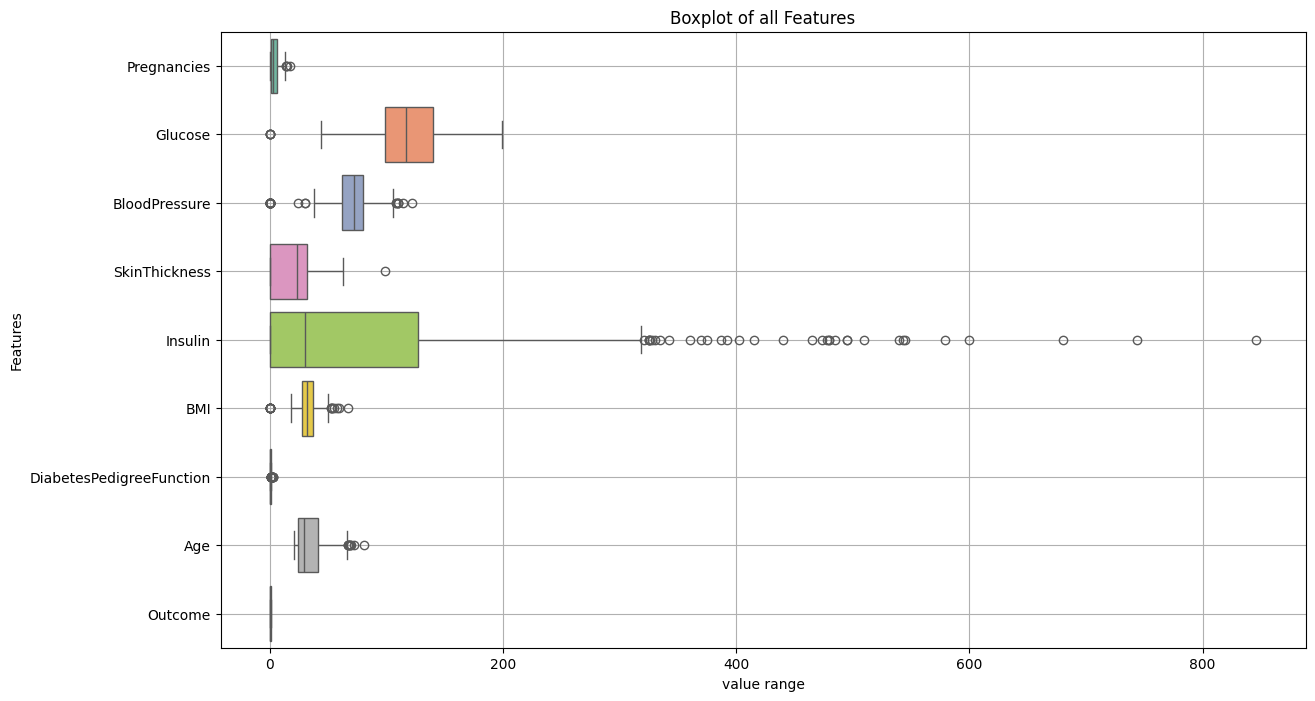

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, orient='h', palette='Set2')  # horizontal boxplots for better readability
plt.title('Boxplot of all Features')
plt.xlabel('value range')
plt.ylabel('Features')
plt.grid(True)
plt.show()

<h3>Boxplot Summary</h3>

<p>
The boxplot visualizes the distribution and spread of each feature, helping to identify outliers and skewness in the dataset.
</p>

<ul>
  <li>Several features like <code>Insulin</code>, <code>SkinThickness</code>, and <code>BloodPressure</code> show a large number of outliers.</li>
  <li><code>Insulin</code> especially has extreme values, indicating high variability.</li>
  <li>Features like <code>BMI</code>, <code>Glucose</code>, and <code>Age</code> show relatively consistent distributions.</li>
  <li><code>Outcome</code> is binary and appears compressed near 0 and 1 as expected.</li>
</ul>

<p>
This plot highlights the need for potential outlier treatment or normalization before applying distance-based models like KNN.
</p>


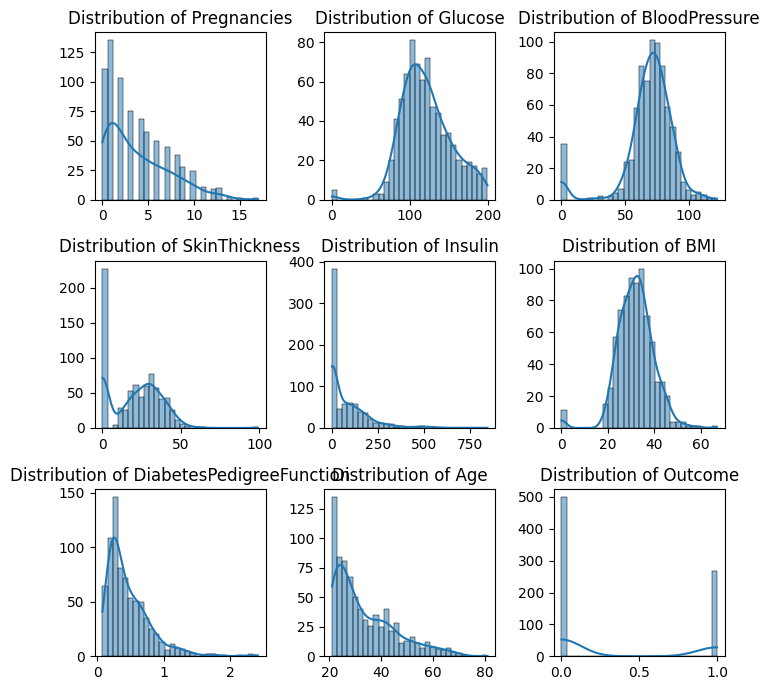

In [30]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(7,7))
for i, col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


<h3>Feature Distribution Analysis</h3>

<p>
The histograms and KDE plots help visualize the distribution of each feature in the dataset:
</p>

<ul>
  <li><strong>Pregnancies, SkinThickness, Insulin, Age, and DiabetesPedigreeFunction</strong> show right-skewed distributions, with many low values and a few extreme high values.</li>
  <li><strong>Glucose, BloodPressure, and BMI</strong> have more symmetric distributions, though slight skewness and outliers are still visible.</li>
  <li><strong>Outcome</strong> is binary and clearly separated into 0 and 1, confirming the classification nature of the task.</li>
</ul>

<p>
Understanding these distributions is essential for deciding preprocessing techniques like normalization, transformation, and outlier handling—especially important for KNN and other distance-based models.
</p>


In [34]:
# Replace zero values with NaN for specific columns where 0 is not a valid measurement.
# These columns (like Glucose, BloodPressure, etc.) cannot realistically have a value of 0,
# so zeros are treated as missing data.

cols_with_zero=['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']
for col in cols_with_zero:
  df[col]=df[col].replace(0,np.nan)

In [35]:
# Fill missing (NaN) values in selected columns with their respective median values.
# Median is used instead of mean to reduce the effect of outliers in features like Insulin and SkinThickness.

df[cols_with_zero]=df[cols_with_zero].fillna(df[cols_with_zero].median())

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [33]:
# Split the dataset into features (X) and target variable (y).
# 'Outcome' is the target label indicating diabetes presence (1) or absence (0),
# and the rest of the columns are used as input features.

x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
sc=StandardScaler()
x_train_scale=sc.fit_transform(x_train)
x_test_scale=sc.transform(x_test)

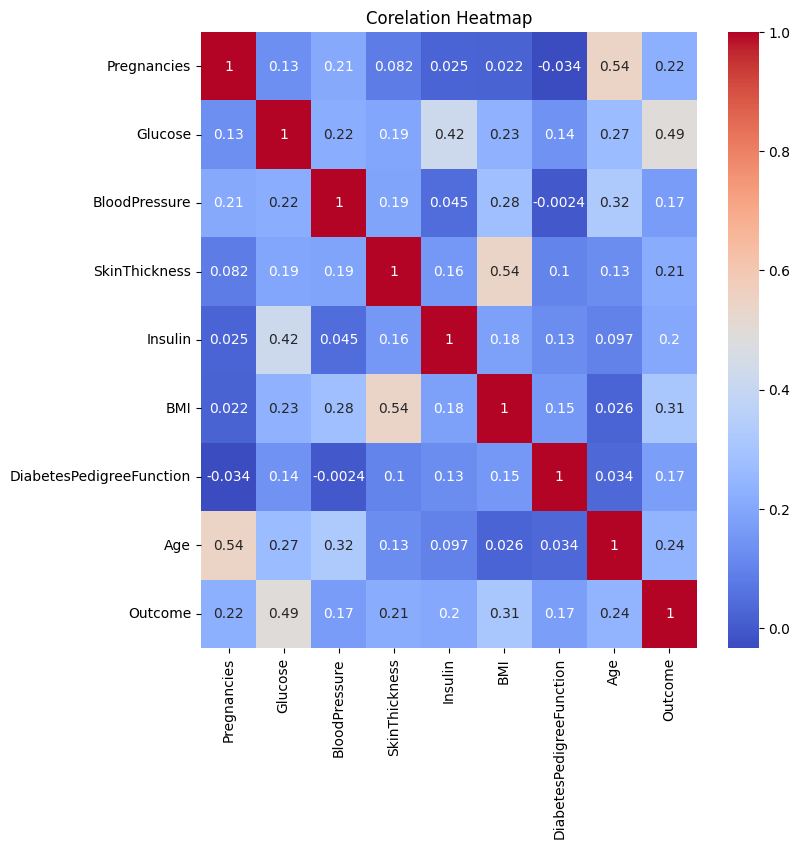

In [42]:
corelation=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corelation,annot=True,cmap='coolwarm')
plt.title('Corelation Heatmap')
plt.show()

<h3 style="color: #2c3e50;"> Correlation Heatmap</h3>

<p>The correlation heatmap below illustrates the pairwise <strong>Pearson correlation coefficients</strong> among all the features in the diabetes dataset.</p>

<ul>
  <li><strong>Values near +1</strong> → Strong positive correlation</li>
  <li><strong>Values near -1</strong> → Strong negative correlation</li>
  <li><strong>Values near 0</strong> → Weak or no linear relationship</li>
</ul>

<p>
  We chose to keep all features in the model since:
  <ul>
    <li>Multicollinearity is not severe</li>
    <li>Every feature may contribute unique information</li>
  </ul>
</p>

<hr>



In [2]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.
# It generates synthetic examples of the minority class to balance the dataset,
# improving model performance on underrepresented classes.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [49]:
X_train_smote, y_train_smote = smote.fit_resample(x_train_scale, y_train)


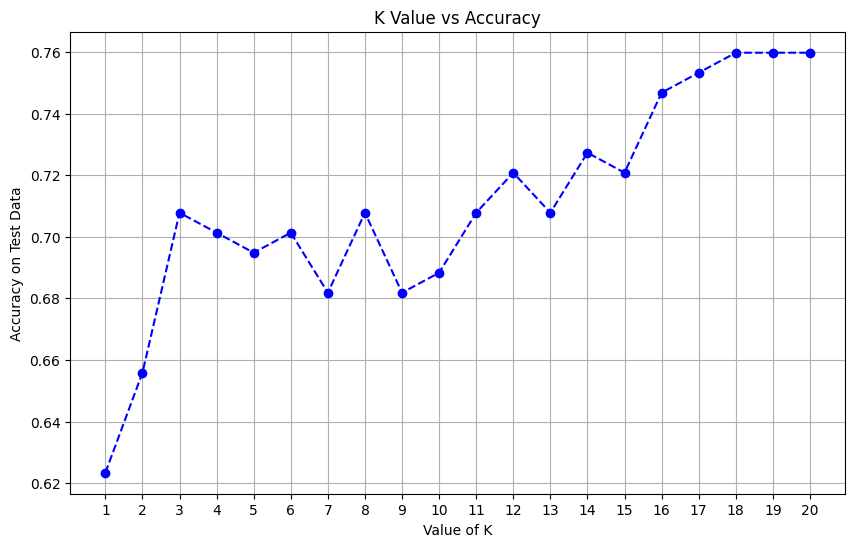

k value: 18
 accuracy: 0.7597402597402597


In [68]:
# define a range of k values to test (from 1 to 20)
k_range = range(1, 21)
accuracy_scores = []  # list to store accuracy for each k

# iterate through each k value
for k in k_range:
    # initialize the knn classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # train the model using scaled training data
    knn.fit(x_train_scale, y_train)

    # predict on the scaled test data
    y_pred = knn.predict(x_test_scale)

    # calculate accuracy and append to the list
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# plot k values vs. accuracy to visualize the best k
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('k value vs accuracy')
plt.xlabel('value of k')
plt.ylabel('accuracy on test data')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# identify the k value with the highest accuracy
best_k = k_range[accuracy_scores.index(max(accuracy_scores))]

# print the best k and corresponding accuracy
print("k value:", best_k)
print("accuracy:", max(accuracy_scores))


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=18)

knn.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=18)

<h3>Why K-Nearest Neighbors (KNN) for Diabetes Prediction?</h3>

<ul>
  <li><strong>Supervised Learning:</strong> This is a classification problem where the target variable <code>Outcome</code> indicates whether a patient has diabetes (1) or not (0). KNN is a supervised learning algorithm suitable for such binary classification tasks.</li>

  <li><strong>No Assumptions About Data Distribution:</strong> KNN is a non-parametric method, meaning it makes no assumptions about the underlying data distribution. This is ideal for real-world medical data which may not follow a specific pattern.</li>

  <li><strong>Simple and Intuitive:</strong> KNN is easy to understand and implement. It classifies a new data point based on the majority class of its 'K' nearest neighbors.</li>

  <li><strong>Effective with Feature Scaling:</strong> After scaling features (e.g., using StandardScaler), KNN can perform well by accurately measuring distances between data points in high-dimensional space.</li>

  <li><strong>Suitable for Smaller Datasets:</strong> KNN works efficiently when the dataset is not extremely large, making it a good fit for the PIMA Diabetes dataset used here.</li>
</ul>


In [60]:
y_pred=knn.predict(x_test_scale)

In [70]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [71]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7597402597402597


### Final Model Performance Summary (KNN Classifier)

- **Accuracy:** `~76%`  
  The model correctly predicted the outcome for approximately 76% of the test data.



In [72]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        99
           1       0.75      0.49      0.59        55

    accuracy                           0.76       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154


Confusion Matrix:
 [[90  9]
 [28 27]]


- **True Negatives (TN):** 90  
- **False Positives (FP):** 9  
- **False Negatives (FN):** 28  
- **True Positives (TP):** 27  

- **Class-wise Metrics:**
- **Class 0 (Non-Diabetic):**
  - Precision: 0.76
  - Recall: 0.91
  - F1-Score: 0.83
- **Class 1 (Diabetic):**
  - Precision: 0.75
  - Recall: 0.49
  - F1-Score: 0.59

- **Macro Average:**
- Precision: 0.76
- Recall: 0.70
- F1-Score: 0.71

- **Weighted Average:**
- Precision: 0.76
- Recall: 0.76
- F1-Score: 0.75

###  Interpretation:

- The model performs **well in detecting non-diabetic cases (Class 0)** with high recall (0.91).
- However, it **struggles with diabetic cases (Class 1)**, showing a lower recall of 0.49 — meaning many diabetic patients are misclassified as non-diabetic.
- Precision is relatively balanced for both classes.
- Overall, the model has decent accuracy but may **benefit from improvements like feature engineering, more balanced data (e.g., SMOTE), or a different algorithm** to better identify diabetic cases.
